
# Mean: 
    - The mean, often called the average, is a measure of central tendency in a distribution. 

    It is calculated by adding up all the values in a dataset and then dividing by the number of 
    values in that dataset. For example, if we have a dataset [1, 2, 3, 4, 5], the mean would be (1+2+3+4+5)/5 = 3. 
    The mean gives us a general idea of the 'center' of our data.

# Variation (Variance): 
    - Variance is a measure of how spread out the values in a dataset are around the mean. 

    It is calculated by taking the average of the squared differences from the Mean. For example, for the same 
    dataset [1, 2, 3, 4, 5], the variance would be calculated as follows: First, find the mean (which is 3), then 
    subtract the mean from each number and square the result ([4, 1, 0, 1, 4]), then take the average of these squared
    differences, which gives us 2. Variance gives us a measure of the 'spread' or 'dispersion' of our data. The square
    root of the variance gives us the standard deviation, which is another common measure of spread.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/var/folders/x0/b0s4r41d0312h6mf4w2sqpfr0000gn/T/ipykernel_9130/2225940201.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# To recall, this is the code to mimic the roll dice game for 50 times

die = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [7]:
# This is the code for summarizing the results of sum of faces by frequency

freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index() #this will associate each possible outcome with the number of times it happenned
print(sort_freq)

0
3     3
4     4
5     5
6     6
7     8
8     9
9     6
10    4
11    5
Name: count, dtype: int64


<Axes: xlabel='0'>

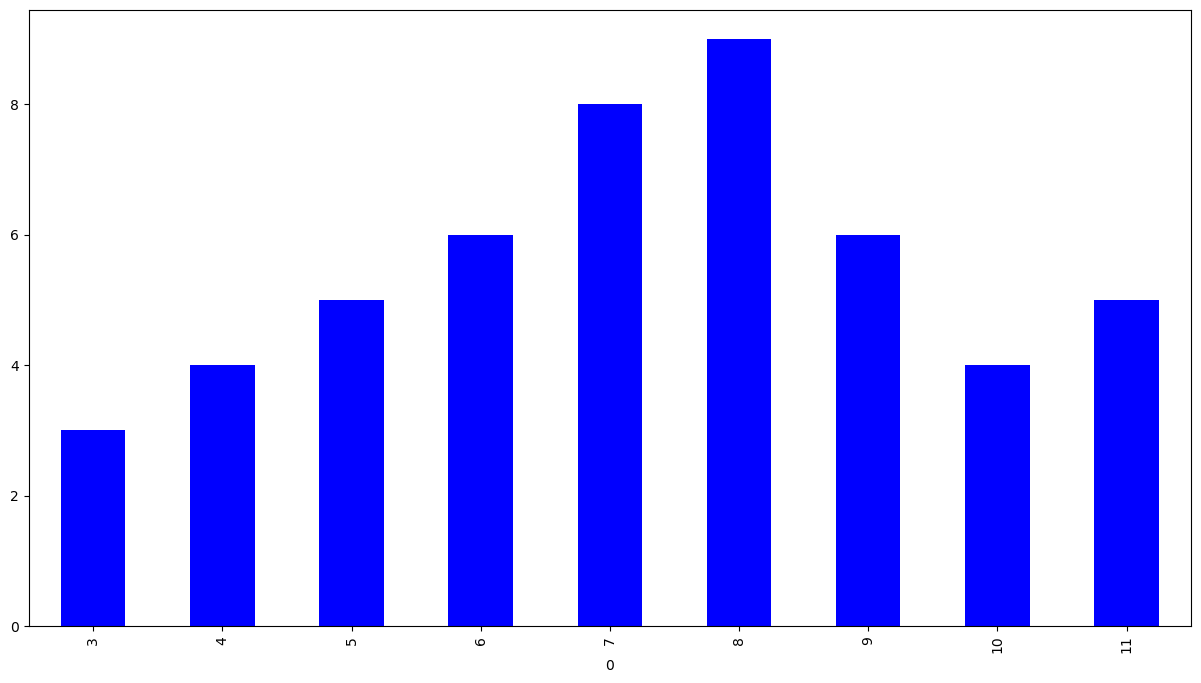

In [8]:
#plot the bar chart base on the result

sort_freq.plot(kind='bar', color='blue', figsize=(15, 8))

### Relative Frequency

### Why do we use relative frequency instead of frequency?
    

<Axes: xlabel='0'>

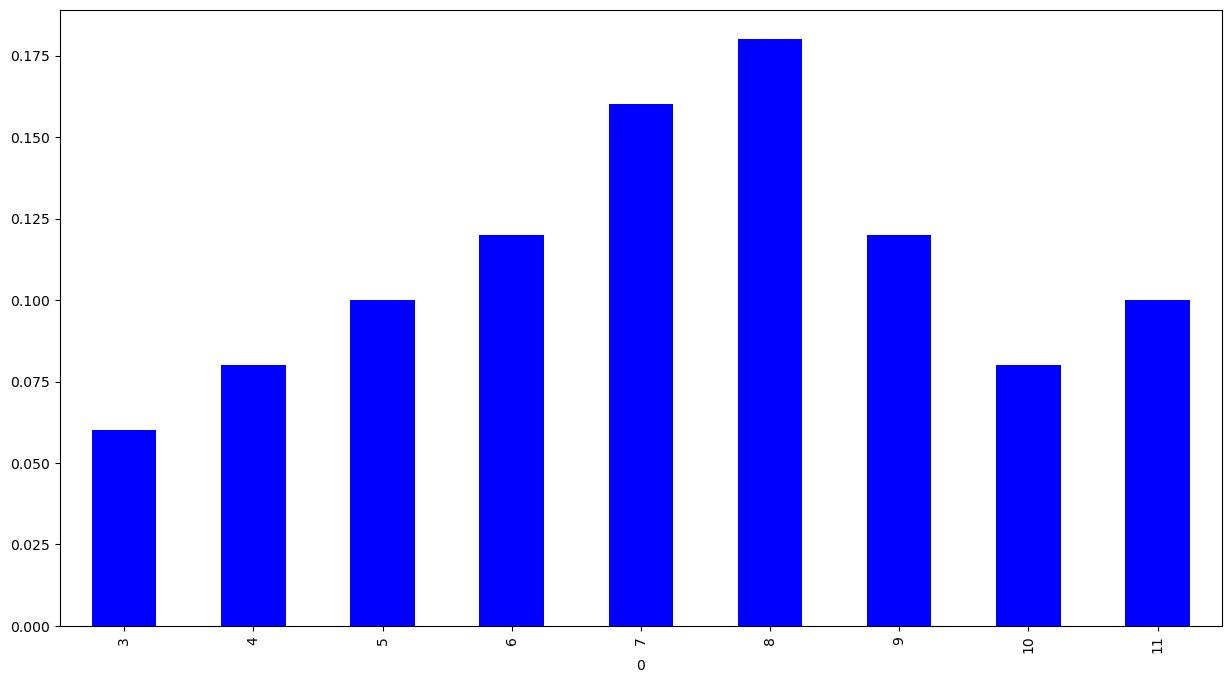

In [9]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

<Axes: xlabel='0'>

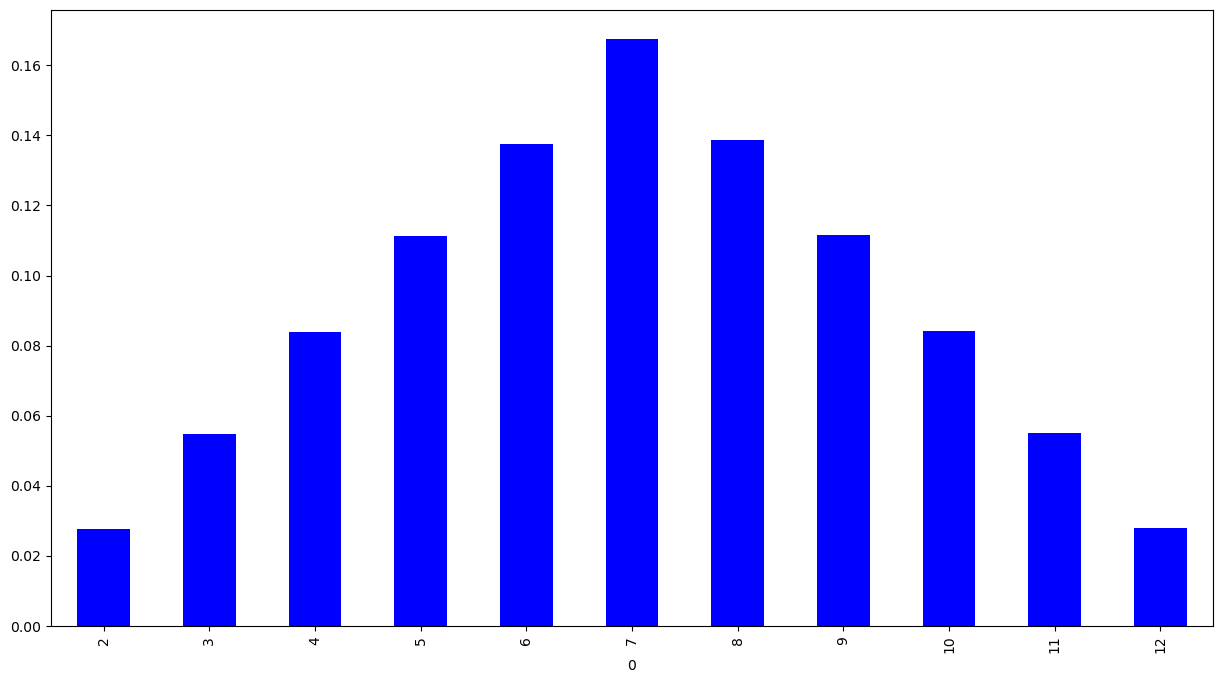

In [18]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 100000 #it gets closer to a normal distribution
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

### We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. Try increasing the number of "trial" further (but it may take some time for Jupyter Notebook to output the result)

## Expectation and Variance of a distribution

In [11]:
# assume that we have fair dice, which means all faces will be shown with equal probability
# then we can say we know the 'Distribtuion' of the random variable - sum_of_dice

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [12]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

In [13]:
#Output the mean and variance of the distribution. Mean and variance can be used to describe a distribution
print(mean, var)

6.999999999999998 5.833333333333333


## Empirical  mean and variance

In [14]:
# if we calculate mean and variance of outcomes (with high enough number of trials, eg 20000)...
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [15]:
#print the mean and variance of the 20000 trials
results = pd.Series(results)
print(results.mean(), results.var())

6.98695 5.859172656132807
